In [1]:
import pandas as pd
import datetime as dt
import time
import datetime
from matplotlib import pyplot
import string
%matplotlib inline
from nltk import word_tokenize, sent_tokenize, pos_tag, TweetTokenizer

In [11]:
drugs=[]
with open("drug_selection.txt") as instream:
    for line in instream:
        drugs.append(line.replace('Â\xa0\n','').replace('Â\xa0',''))

In [ ]:
filename =""
base_data = pd.read_csv(filename, sep="|", encoding='UTF-8',warn_bad_lines=True,error_bad_lines=False)

In [ ]:
base_data

In [15]:
keepindex = set()
for index, row in base_data.iterrows():
    words = [s.lower() for s in word_tokenize(str(row.body))]
    for drug in drugs:
        try:
            if drug in words :
                keepindex.add(index)
                break
        except Exception as e:
            print(str(row.body), str(e))
    if index%1000==0:
        print(index, " done, ", len(keepindex), "mentions found")
#43520

0  done,  0 mentions found
1000  done,  224 mentions found
2000  done,  431 mentions found
3000  done,  601 mentions found
4000  done,  740 mentions found
5000  done,  953 mentions found
6000  done,  1099 mentions found
7000  done,  1246 mentions found
8000  done,  1457 mentions found
9000  done,  1640 mentions found
10000  done,  1789 mentions found
11000  done,  1981 mentions found
12000  done,  2180 mentions found
13000  done,  2319 mentions found
14000  done,  2462 mentions found
15000  done,  2596 mentions found
16000  done,  2733 mentions found
17000  done,  2886 mentions found
18000  done,  2971 mentions found
19000  done,  3132 mentions found
20000  done,  3243 mentions found
21000  done,  3398 mentions found
22000  done,  3488 mentions found
23000  done,  3633 mentions found
24000  done,  3831 mentions found
25000  done,  3965 mentions found
26000  done,  4079 mentions found
27000  done,  4183 mentions found
28000  done,  4250 mentions found
29000  done,  4326 mentions found
3

In [16]:
list(sorted(keepindex))

[57,
 58,
 60,
 70,
 71,
 72,
 76,
 78,
 79,
 86,
 88,
 89,
 90,
 91,
 92,
 93,
 96,
 98,
 101,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 148,
 149,
 150,
 151,
 160,
 162,
 175,
 176,
 177,
 178,
 181,
 183,
 184,
 185,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 199,
 200,
 201,
 208,
 210,
 211,
 215,
 216,
 217,
 226,
 227,
 232,
 253,
 264,
 265,
 266,
 267,
 268,
 269,
 306,
 308,
 309,
 320,
 328,
 334,
 336,
 337,
 338,
 346,
 382,
 396,
 397,
 411,
 412,
 425,
 426,
 427,
 430,
 431,
 432,
 435,
 444,
 448,
 449,
 469,
 486,
 487,
 488,
 489,
 490,
 491,
 493,
 494,
 495,
 496,
 497,
 499,
 501,
 502,
 503,
 505,
 534,
 535,
 536,
 537,
 538,
 544,
 545,
 546,
 551,
 558,
 559,
 560,
 572,
 581,
 587,
 588,
 591,
 592,
 594,
 618,
 622,
 650,
 655,
 656,
 658,
 667,
 691,
 692,
 694,
 695,
 698,
 699,
 700,
 702,
 708

In [17]:
mentions_df = base_data.iloc[list(sorted(keepindex))]

In [ ]:
mentions_df.body

In [ ]:
def ret_len(mystr):
    return len(word_tokenize(mystr))

mentions_df["wordlen"] = mentions_df.body.apply(ret_len)

In [22]:
print("Total Posts", len(mentions_df.url))
print("Shortest post", mentions_df.wordlen.min())
print("Longest post",mentions_df.wordlen.max())
print("Mean length post",mentions_df.wordlen.mean())
print("Median length post",mentions_df.wordlen.median())
print("Mode length post",mentions_df[mentions_df.wordlen>1].wordlen.mode())

Total Posts 29086
Shortest post 1
Longest post 9919
Mean length post 136.23282678952074
Median length post 99.0
Mode length post 0    56
dtype: int64


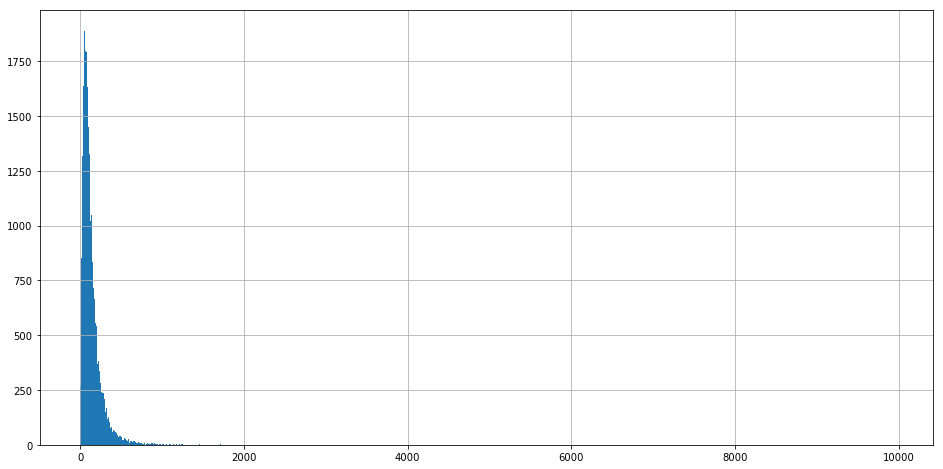

In [24]:
_=mentions_df.wordlen.hist(bins=1000, figsize=(16,8))

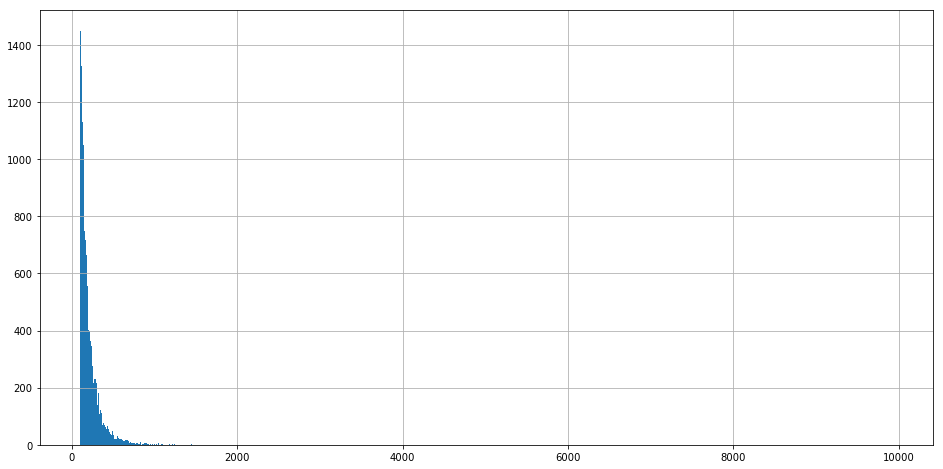

In [28]:
cutoff = 100
_=mentions_df[mentions_df.wordlen>cutoff].wordlen.hist(bins=1000, figsize=(16,8))

In [30]:
cutoff = 100
with open('df_posts_shortened.csv', 'w', encoding='UTF-8') as writer:
    writer.write("url|title|comment_num|total_comments|username|timestamp|wordlen|body|\n")
    for index, row in mentions_df.iterrows():
        if row.wordlen>cutoff:
            bodytext = row.body
            sent_len = 0
            my_sent=""
            for sent in sent_tokenize(bodytext):
                this_len = len(word_tokenize(sent))
                if sent_len+this_len<=cutoff:
                    my_sent = my_sent + " " + sent
                    sent_len += this_len
                else:
                    my_len = len(word_tokenize(my_sent))
                    if my_len<cutoff:
                        #print(my_len)
                        #print(this_len)
                        #print(sent)
                        #print(my_sent)
                        writer.write(str(row.url) + "|" + str(row.title) + "|" + str(row.comment_num) + "|" + str(row.total_comments)
                                     + "|" + str(row.username) + "|" + str(row.timesamp)
                                     + "|" + str(my_len) + "|" + my_sent.strip().replace("\n","").replace("|","")+"\n")
                    #print(my_sent.strip())
                    my_sent=sent
                    sent_len = this_len
            my_len = len(word_tokenize(my_sent))
            if my_len<cutoff:
                #print(my_len)
                #print(this_len)
                #print(sent)
                #print(my_sent)
                writer.write(str(row.url) + "|" + str(row.title) + "|" + str(row.comment_num) + "|" + str(row.total_comments)
                                     + "|" + str(row.username) + "|" + str(row.timesamp)
                                     + "|" + str(my_len) + "|" + my_sent.strip().replace("\n","").replace("|","")+"\n")
            #print(my_sent.strip())
            #print(len((my_sent)))
        else:
            writer.write(str(row.url) + "|" + str(row.title) + "|" + str(row.comment_num) + "|" + str(row.total_comments)
                                     + "|" + str(row.username) + "|" + str(row.timesamp)
                                     + "|" + str(row.wordlen) + "|" + row.body.replace("\n","").replace("|","")+"\n")

In [31]:
mentions_df_s = pd.read_csv('df_posts_shortened.csv', sep="|", encoding='UTF-8')

In [ ]:
mentions_df_s

In [33]:
print("Total Posts", len(mentions_df_s.url))
print("Shortest post", mentions_df_s.wordlen.min())
print("Longest post",mentions_df_s.wordlen.max())
print("Mean length post",mentions_df_s.wordlen.mean())
print("Median length post",mentions_df_s.wordlen.median())
print("Mode length post",mentions_df_s[mentions_df_s.wordlen>1].wordlen.mode())

Total Posts 54635
Shortest post 0
Longest post 100
Mean length post 68.08981422165279
Median length post 77.0
Mode length post 0    97
dtype: int64


In [34]:
keepindex = set()
for index, row in mentions_df_s.iterrows():
    words = [s.lower() for s in word_tokenize(str(row.body))]
    for drug in drugs:
        try:
            if drug in words :
                keepindex.add(index)
                break
        except Exception as e:
            print(str(row.body), str(e))
    if index%1000==0:
        print(index, " done, ", len(keepindex), "mentions found")

0  done,  0 mentions found
1000  done,  692 mentions found
2000  done,  1400 mentions found
3000  done,  2043 mentions found
4000  done,  2723 mentions found
5000  done,  3407 mentions found
6000  done,  4031 mentions found
7000  done,  4752 mentions found
8000  done,  5454 mentions found
9000  done,  6122 mentions found
10000  done,  6790 mentions found
11000  done,  7450 mentions found
12000  done,  8107 mentions found
13000  done,  8735 mentions found
14000  done,  9363 mentions found
15000  done,  10000 mentions found
16000  done,  10657 mentions found
17000  done,  11266 mentions found
18000  done,  11926 mentions found
19000  done,  12540 mentions found
20000  done,  13159 mentions found
21000  done,  13804 mentions found
22000  done,  14413 mentions found
23000  done,  15020 mentions found
24000  done,  15619 mentions found
25000  done,  16192 mentions found
26000  done,  16790 mentions found
27000  done,  17348 mentions found
28000  done,  17912 mentions found
29000  done,  184

In [35]:
final_posts = mentions_df_s.iloc[list(sorted(keepindex))]

In [ ]:
def islastpunct(mystr):
    punct = set(string.punctuation)
    if isinstance(mystr, str):
        if mystr[-1] in punct:
            return mystr
        else:
            return mystr + "."
    else:
        return mystr

def addtitle(comment_num, title, body):
    if comment_num==0:
        return islastpunct(title) + " " + body
    else:
        return body
    
final_posts["body"] = final_posts.apply(lambda row: addtitle(row['comment_num'],row['title'],row['body']),axis=1)

In [64]:
final_posts = final_posts.loc[:, ~final_posts.columns.str.contains('^Unnamed')]

In [ ]:
final_posts

In [66]:
print("Total Posts", len(final_posts.url))
print("Shortest post", final_posts.wordlen.min())
print("Longest post",final_posts.wordlen.max())
print("Mean length post",final_posts.wordlen.mean())
print("Median length post",final_posts.wordlen.median())
print("Mode length post",final_posts[final_posts.wordlen>1].wordlen.mode())

Total Posts 32841
Shortest post 1
Longest post 100
Mean length post 70.34986754361925
Median length post 78.0
Mode length post 0    97
dtype: int64


In [85]:
final_posts['body'] = final_posts['body'].str.lower()

In [86]:
final_posts['words'] = final_posts['body'].apply(word_tokenize)

In [87]:
def tag_pos(mylist):
    return [x[1] for x in pos_tag(mylist)]
final_posts["pos"] = final_posts.words.apply(tag_pos)

In [88]:
for index, row in final_posts.iterrows():
    if len(row.pos)!=len(row.words):
        print(index)

In [ ]:
for index, row in final_posts.sample(20).iterrows():
    print(row.words)
    print("\n")

In [90]:
export_df = final_posts[["body","wordlen","words","pos"]]

In [ ]:
export_df.body = export_df.body.str.strip()

In [92]:
export_df.to_csv("MH_final.csv", index=False, sep="|", encoding="utf-8")

In [2]:
export_df2 = pd.read_csv("MH_final.csv", sep="|", encoding="utf-8")